In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
pulls_one = pd.read_csv('pulls_2011-2013.csv')
pulls_two = pd.read_csv('pulls_2014-2018.csv')
pull_files = pd.read_csv('pull_files.csv')

In [3]:
print(pulls_one.head())
print(pulls_one.shape)

        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z
(3296, 3)


In [4]:
print(pulls_two.head())
print(pulls_two.shape)

         pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
(2904, 3)


In [5]:
print(pull_files.head())
print(pull_files.shape)


         pid                                   file
0  163314316        test/files/pos/t5638/Among.java
1  163314316       test/files/pos/t5638/Usage.scala
2  163314316             test/files/pos/t9291.scala
3  163314316             test/files/run/t8348.check
4  163314316  test/files/run/t8348/TableColumn.java
(85588, 2)


In [6]:
pulls = pulls_two.append(pulls_one)

In [7]:
print(pulls.head())
print(pulls.shape)
print(pulls.info())

         pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
(6200, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 193.8+ KB
None


In [8]:
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

In [9]:
pulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 193.8+ KB


In [10]:
data = pulls.merge(pull_files, on = 'pid')

In [11]:
data.head()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


In [12]:
data['month'] = data['date'].dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [13]:
data['year'] = data['date'].dt.to_period('Y')

In [14]:
counts = data.groupby(['month','year']).size()

In [15]:
counts

month    year
2011-12  2011     590
2012-01  2012     489
2012-02  2012     787
2012-03  2012     880
2012-04  2012    3354
                 ... 
2017-09  2017     578
2017-10  2017     535
2017-11  2017     172
2017-12  2017     224
2018-01  2018     202
Length: 74, dtype: int64

<AxesSubplot:xlabel='month,year'>

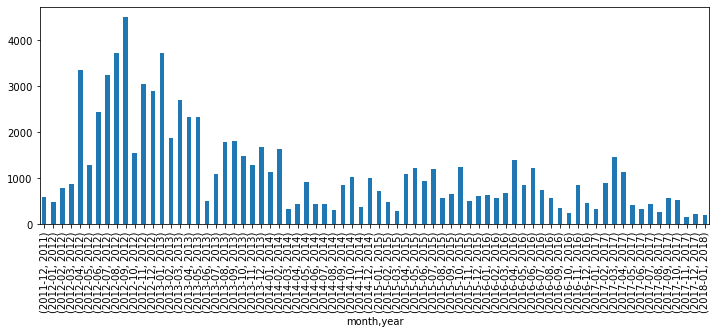

In [16]:
counts.plot(kind='bar', figsize = (12,4))

In [17]:
by_user = data.groupby('user').size()

<AxesSubplot:xlabel='user'>

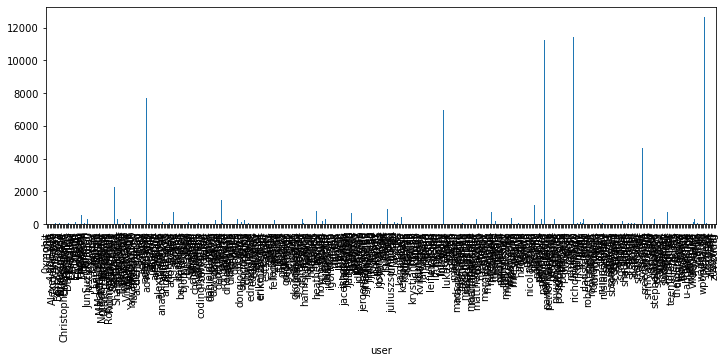

In [18]:
by_user.plot(kind='bar', figsize = (12,4))

In [19]:
pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


In [20]:
last_10 = pulls.sort_values('date', ascending = True).tail(10)

In [21]:
joined_pr = pull_files.merge(last_10, on='pid')

In [22]:
joined_pr.head()

,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00


In [23]:
files = set(joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [24]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [25]:
file_pr = pull_files[pull_files['file'] == file]
file_pr.head(2)

,pid,file
13,162838837,src/compiler/scala/reflect/reify/phases/Calcul...
26951,22845163,src/compiler/scala/reflect/reify/phases/Calcul...


In [26]:
file_pr = file_pr.merge(pulls[['pid', 'user']], on = 'pid')

In [27]:
file_pr.head()

,pid,file,user
0,162838837,src/compiler/scala/reflect/reify/phases/Calcul...,zuvizudar
1,22845163,src/compiler/scala/reflect/reify/phases/Calcul...,retronym
2,12102550,src/compiler/scala/reflect/reify/phases/Calcul...,xeno-by
3,10587633,src/compiler/scala/reflect/reify/phases/Calcul...,retronym
4,5320191,src/compiler/scala/reflect/reify/phases/Calcul...,soc


In [28]:
author_counts = file_pr.groupby('user').size()

In [29]:
author_counts.nlargest(3)

user
xeno-by     11
retronym     5
soc          4
dtype: int64

In [39]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [40]:
file_pr = pull_files[pull_files['file'] == file]
joined_pr = file_pr.merge(pulls, on = 'pid')

In [41]:
joined_pr.head(3)

,pid,file,user,date
0,162838837,src/compiler/scala/reflect/reify/phases/Calcul...,zuvizudar,2018-01-14 19:16:16+00:00
1,22845163,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2014-10-16 10:23:42+00:00
2,12102550,src/compiler/scala/reflect/reify/phases/Calcul...,xeno-by,2014-02-01 01:19:58+00:00


In [42]:
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

In [43]:
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

In [44]:
pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


<AxesSubplot:xlabel='date'>

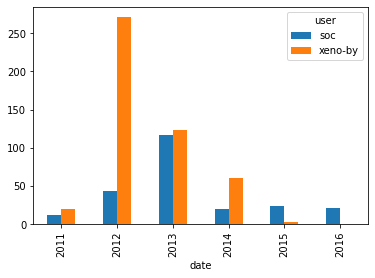

In [53]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot.bar()

In [54]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [60]:
by_author = data[data['user'].isin(authors)]
by_author.head()

,pid,user,date,file,month,year
7989,93445328,soc,2016-11-12 17:21:25+00:00,src/compiler/scala/tools/nsc/backend/jvm/BCode...,2016-11,2016
7990,93445328,soc,2016-11-12 17:21:25+00:00,src/compiler/scala/tools/nsc/backend/jvm/BCode...,2016-11,2016
7991,93445328,soc,2016-11-12 17:21:25+00:00,src/compiler/scala/tools/nsc/transform/Constru...,2016-11,2016
7992,93445328,soc,2016-11-12 17:21:25+00:00,src/compiler/scala/tools/nsc/transform/Fields....,2016-11,2016
7993,93445328,soc,2016-11-12 17:21:25+00:00,src/compiler/scala/tools/nsc/transform/Flatten...,2016-11,2016


In [61]:
by_file = by_author[by_author['file'] == file]
by_file.head()

,pid,user,date,file,month,year
32753,12102550,xeno-by,2014-02-01 01:19:58+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2014-02,2014
46700,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04,2013
52527,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-02,2013
63137,2721711,soc,2012-10-21 19:58:20+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2012-10,2012
69684,2072662,xeno-by,2012-08-16 05:39:22+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2012-08,2012


In [66]:
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

In [67]:
by_file_wide = grouped.pivot_table(index='date', columns = 'user', values = 'pid', fill_value=0)

<AxesSubplot:xlabel='date'>

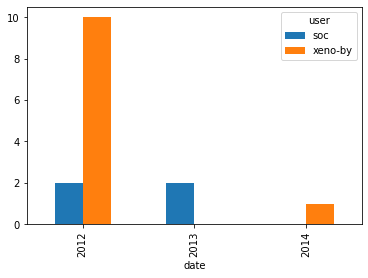

In [68]:
by_file_wide.plot(kind='bar')